# Descente de gradient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Question 1a)

def grad_desc(df, x_init, gamma, eps, maxiter):
    """Descente de gradient normale.
    On pourra utiliser des types python natifs ou des np.ndarray 
    pour x_init et le type d'argument de df.
    """
    x = x_init
    iters = []
    is_numpy = isinstance(x_init, np.ndarray) # 
    for i in range(maxiter):
        g = df(x)
        norm = np.linalg.norm(g, ord=np.inf) if is_numpy else abs(g)
        if norm <= eps:
            break
        iters.append(x.copy() if is_numpy else x)
        x = x-gamma*g
    return np.array(iters)

In [3]:
# Question 1b) Test avec un espace de départ de dimension 23

# On définit une matrice symétrique définie positive (très simple) de taille 23x23 :
A = np.eye(23, 23)


def f_23(x):
    return x.T @ A @ x / 2


def f_23_grad(x):
    return A @ x


x_init = np.full(23, 1)

iters = grad_desc(f_23_grad, x_init, gamma=0.3, eps=10e-5, maxiter=500)

print(f"L'algo converge en {len(iters)} itérations.")
print("On peut observer, par exemple, la convergence d'une coordonée des itérés : ")
print(iters[:,0])


L'algo converge en 26 itérations.
On peut observer, par exemple, la convergence d'une coordonée des itérés : 
[1.00000000e+00 7.00000000e-01 4.90000000e-01 3.43000000e-01
 2.40100000e-01 1.68070000e-01 1.17649000e-01 8.23543000e-02
 5.76480100e-02 4.03536070e-02 2.82475249e-02 1.97732674e-02
 1.38412872e-02 9.68890104e-03 6.78223073e-03 4.74756151e-03
 3.32329306e-03 2.32630514e-03 1.62841360e-03 1.13988952e-03
 7.97922663e-04 5.58545864e-04 3.90982105e-04 2.73687473e-04
 1.91581231e-04 1.34106862e-04]


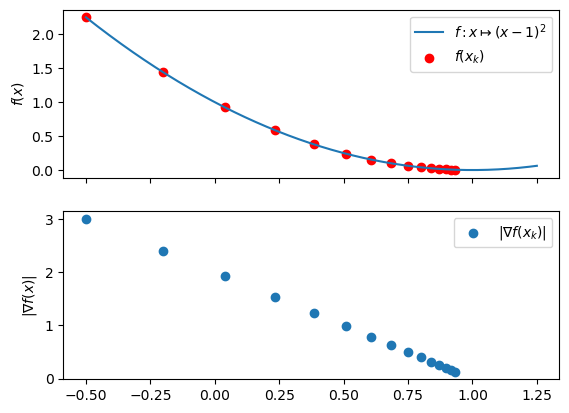

In [4]:
# Question 1c: Test unidimensionnel

def f(x):
    return (x-1)**2


def df(x):
    return 2*x-2

# Execution de la descente de gradient

x_init = -1/2
iters = grad_desc(df, x_init=x_init, gamma=0.1, eps=10e-15, maxiter=15)

# Graphique

x = np.linspace(-0.5, 1.25, 1000)
y = f(x)

fig, (ax_f, ax_grad) = plt.subplots(2, 1, sharex=True)

# Graphe de la fonction f
ax_f.plot(x, y, label="$f:x\mapsto(x-1)^2$")
ax_f.scatter(iters, f(iters), color="red", label="$f(x_k)$")
ax_f.set_ylabel("$f(x)$")
ax_f.legend()

# Graphe des amplitudes des dérivées en chaque point
ax_grad.scatter(iters, np.abs(df(iters)), label=r"$|\nabla f(x_k)|$")
ax_grad.set_ylabel(r"|$\nabla f(x)|$")
ax_grad.legend()


On observe une décroissante linéaire de la norme du gradient.

# Question 2 : Fonction de Rosenbrock

In [5]:
from scipy.optimize import rosen_der

def f_ros(x1, x2):
    return (x1-1)**2 + 100 * (x2-x1**2)**2

# Exécution d'une descente de gradient normale pour 2 valeurs de gamma

x_init = np.array([-1, -0.5])
eps = 10e-10
maxiter = 30

iters3 = grad_desc(rosen_der, x_init, gamma=10e-3, eps=eps, maxiter=maxiter)
iters5 = grad_desc(rosen_der, x_init, gamma=10e-5, eps=eps, maxiter=maxiter)

/home/mesup/miniconda3/envs/optconv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:372: RuntimeWarning: overflow encountered in double_scalars
  der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
/home/mesup/miniconda3/envs/optconv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:373: RuntimeWarning: overflow encountered in double_scalars
  der[-1] = 200 * (x[-1] - x[-2]**2)
/home/mesup/miniconda3/envs/optconv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:372: RuntimeWarning: invalid value encountered in double_scalars
  der[0] = -400 * x[0] * (x[1] - x[0]**2) - 2 * (1 - x[0])
/home/mesup/miniconda3/envs/optconv/lib/python3.10/site-packages/scipy/optimize/_optimize.py:373: RuntimeWarning: invalid value encountered in double_scalars
  der[-1] = 200 * (x[-1] - x[-2]**2)


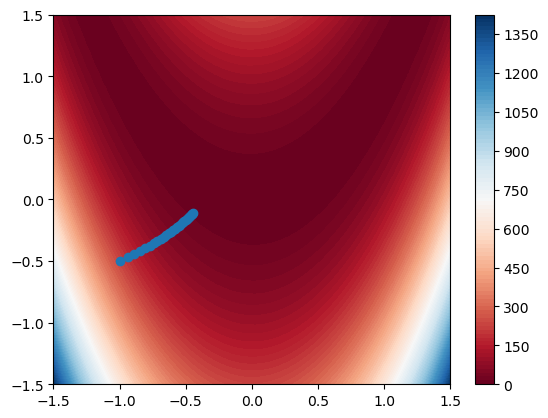

In [6]:
# Graphe des deux descentes : 

x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)

X, Y = np.meshgrid(x,y)
Z = f_ros(X,Y)

plt.contourf(X,Y,Z, 100,cmap= "RdBu")
plt.colorbar()
# plt.scatter(iters3[:,0], iters3[:,1])
plt.scatter(iters5[:,0], iters5[:,1])

# Adaptation du pas

In [7]:
# Question 3 : Descente de gradient avec recherche linéaire

def grad_desc_line_search(f, df, x_init, gamma, eps, maxiter):
    """Effectue une descente de gradient avec recherche linéaire.

    A chaque itération, si la fonction n'a pas assez décru (géré par 'alpha"), 
    le pas 'gamma' est multiplié ou divisé (par le facteur 'tau')    

    Renvoie la liste des x_k et des gamma_k, dans un couple de ndarrays
    """

    alpha, tau = 0.5, 0.5

    x_iters = []
    gamma_iters = []

    x = x_init

    for _ in range(maxiter):
        x_iters.append(x.copy())
        gamma_iters.append(gamma)

        g = df(x)
        norm = np.linalg.norm(g, ord=np.Inf)
        if norm <= eps:
            break
        z = x - gamma * g
        if f(z) <= f(x) - alpha * gamma * norm**2:
            x = z
            gamma /= tau
        else:
            gamma *= tau
        
    return np.array([x_iters]), np.array([gamma_iters])


In [34]:
# Question 4 : Avec pas adaptatif

from math import sqrt

def grad_desc_adaptive_step(df, x_init, gamma, eps, maxiter=5000):
    """Effectue une descente de gradient avec pas adaptatif

    Renvoie la liste des x_k et des gamma_k, dans un couple de ndarrays
    """
    x = [x_init.copy()]
    gamma = [gamma]

    theta = np.Inf

    x.append(x[0] - gamma[0] * df(x[0]))

    for k in range(1, maxiter):
        x_diff = np.linalg.norm(x[-1] - x[-2])
        grad_diff = np.linalg.norm(df(x[-1]) - df(x[-2]))
        a = sqrt(1 + theta) * gamma[-1]
        b = 0.5 * x_diff / grad_diff
        
        gamma.append(min(a, b))

        g = df(x[-1])
        if np.linalg.norm(g, ord=np.Inf) <= eps:
            break
        x.append(x[-1] - gamma[-1] * g)
        theta = gamma[-1]/gamma[-2]
    return x, gamma


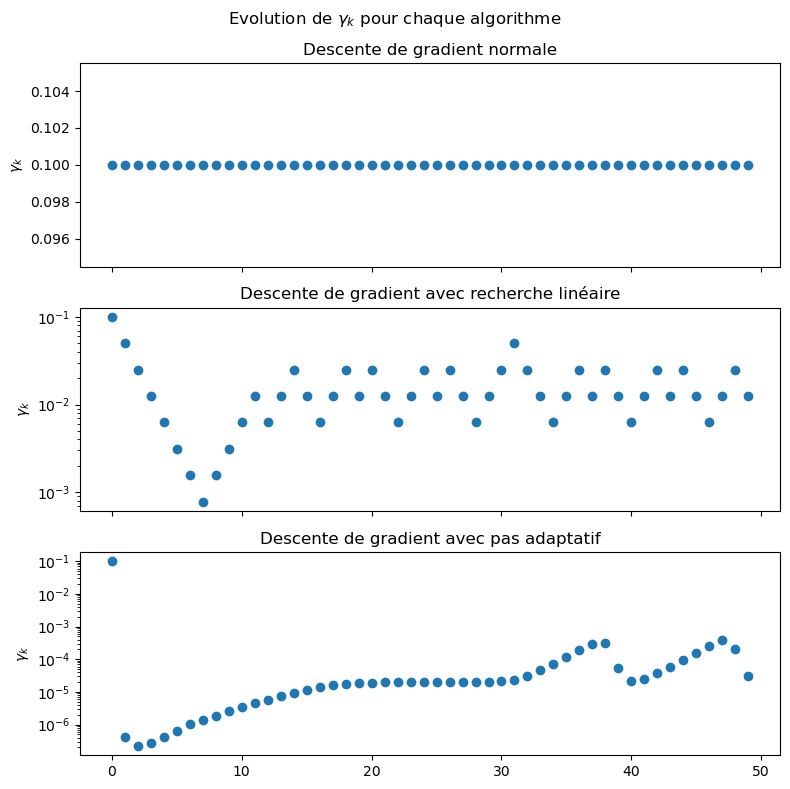

In [64]:
# Evolution de la taille des pas, exemple avec la fonction de Rosenbrock

def f_ros_np(x):
    return (1-x[0])**2 + 100*(x[1]-x[0]**2) ** 2

N = 50 # nb d'itérations max 

x_init = np.array([-1, -0.5])
gamma_initial = 10e-2
eps = 10e-10
iters_x_ls, iters_gamma_ls = grad_desc_line_search(
    f_ros_np, rosen_der, x_init, gamma_initial, eps, maxiter=N)

iters_x_as, iters_gamma_as = grad_desc_adaptive_step(
    rosen_der, x_init, gamma_initial, eps, maxiter=N)



# Graphique


fig, (ax1,ax2,ax3) = plt.subplots(3,1,sharex=True, figsize=(8,8))

fig.suptitle("Evolution de $\gamma_k$ pour chaque algorithme")

ax1.scatter(range(N), np.full(N, gamma_initial))
ax1.title.set_text("Descente de gradient normale")
ax1.set_ylabel(r"$\gamma_k$")

ax2.scatter(range(N), iters_gamma_ls)
ax2.set_yscale('log')
ax2.title.set_text("Descente de gradient avec recherche linéaire")
ax2.set_ylabel(r"$\gamma_k$")

ax3.scatter(range(N), iters_gamma_as)
ax3.set_yscale('log')
ax3.title.set_text("Descente de gradient avec pas adaptatif")
ax3.set_ylabel(r"$\gamma_k$")

fig.tight_layout()
